# The CMD plot in the paper.

In [8]:
%matplotlib inline

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

plotpar = {'axes.labelsize': 30,
           'font.size': 22,
           'legend.fontsize': 10,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [21]:
df0 = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
ml = np.isfinite(df0.stellar_rv.values)
print(sum(ml), "stars with LAMOST RVs after cuts")
mg = (df0.radial_velocity.values != 0)
mg &= np.isfinite(df0.radial_velocity.values)
print(sum(mg), "stars with Gaia RVs after cuts")
ma = np.isfinite(df0.OBSVHELIO_AVG.values)
print(sum(ma), "stars with APOGEE RVs after cuts")
m = np.isfinite(df0.rv.values)
print(sum(m), "stars with RVs after cuts")
print(len(df0), "stars")

37567 stars with LAMOST RVs after cuts
28112 stars with Gaia RVs after cuts
9955 stars with APOGEE RVs after cuts
54702 stars with RVs after cuts
178000 stars


In [15]:
print(len(df0))
f = np.isfinite(df0.color_teffs.values) & (df0.color_teffs.values > 2000) & (df0.color_teffs.values < 10000)
df = df0.iloc[f]
print("removing stars with weird teffs")
print(len(df))

178000
removing stars with weird teffs
177026


In [16]:
m = np.isfinite(df.rv.values)

In [17]:
def abs_mag(m, D):
    return 5 + m - 5*np.log10(D)

M_G = abs_mag(df.phot_g_mean_mag.values, df.r_est.values)

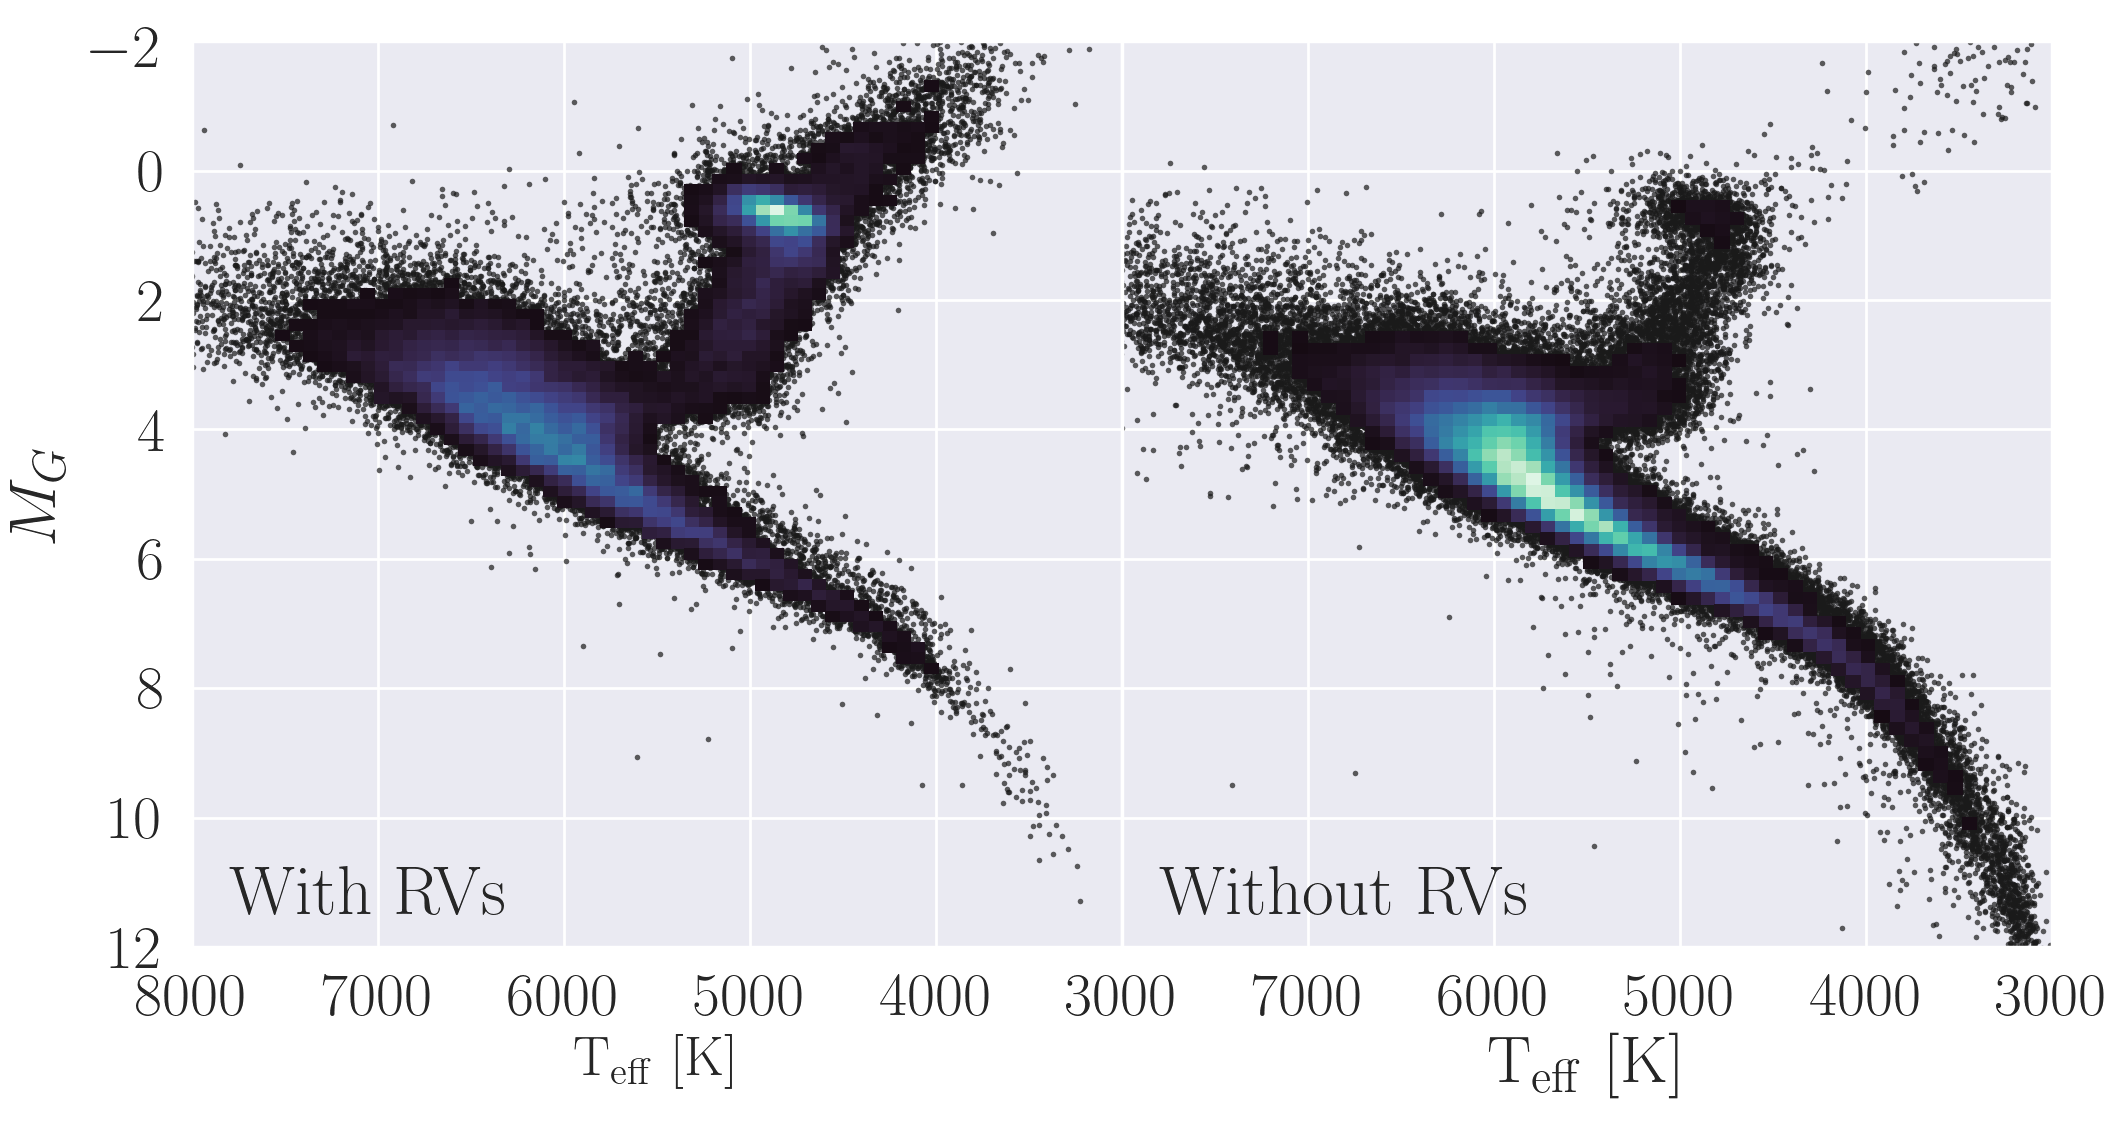

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=200)
ax0 = fig.add_subplot(121)
ax0.plot(df.color_teffs.values[m], M_G[m], "k.", ms=4, mec="none", zorder=1, alpha=.7, rasterized=True)
sns.histplot(x=df.color_teffs.values[m], y=M_G[m], bins=100, pthresh=.1,
             cmap="mako", zorder=2)
ax0.text(7800, 11.5, "$\mathrm{With~RVs}$", fontsize=25)
ax0.set_xlim(8000, 3000)
ax0.set_ylim(12, -2)
ax0.set_ylabel("$M_G$")#, fontsize=20)
ax0.set_xlabel("$\mathrm{T_{eff}~[K]}$", fontsize=20)
sns.set(font_scale = 2)

ax1 = fig.add_subplot(122)
ax1.plot(df.color_teffs.values[~m], M_G[~m], "k.", ms=4, mec="none", zorder=1, alpha=.7, rasterized=True)
sns.histplot(x=df.color_teffs.values[~m], y=M_G[~m], bins=100, pthresh=.1,
             cmap="mako", zorder=2)
ax1.set_xlim(8000, 3000)
ax1.set_ylim(12, -2)
ax1.set_yticklabels([])
ax1.set_xticklabels(["$3000$", "$4000$", "$5000$", "$6000$", "$7000$"])
ax1.set_xlabel("$\mathrm{T_{eff}~[K]}$")#, fontsize=20)
ax1.text(7800, 11.5, "$\mathrm{Without~RVs}$", fontsize=25)
sns.set(font_scale = 2)

plt.subplots_adjust(wspace=0.)

plt.savefig("../plots/CMD")
plt.savefig("../paper/CMD.pdf")

Look at the selection functions of the three surveys.

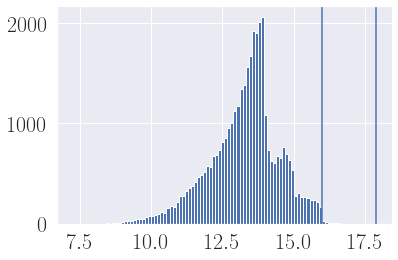

In [32]:
plt.hist(df0.phot_g_mean_mag.values[ml], 100);
plt.axvline(max(df0.phot_g_mean_mag.values[ml]))
plt.axvline(16)

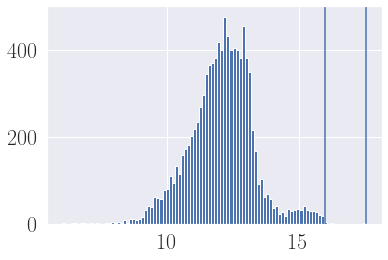

In [34]:
plt.hist(df0.phot_g_mean_mag.values[ma], 100);
plt.axvline(max(df0.phot_g_mean_mag.values[ma]))
plt.axvline(16)

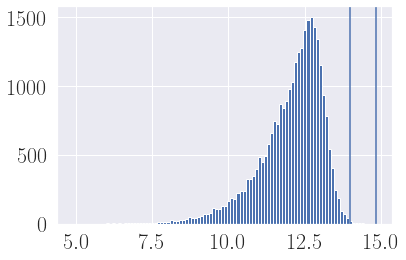

In [35]:
plt.hist(df0.phot_g_mean_mag.values[mg], 100);
plt.axvline(max(df0.phot_g_mean_mag.values[mg]))
plt.axvline(14)